In [0]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# Mounting the Drive So as to share the Data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Loading the Data from Drive mounted based on the 1st cell

df = pd.read_excel('/content/drive/My Drive/SPS_Dt/Bank Marketing Dataset.xlsx', sheet_name="bank-additional-full")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# Get the Size of Dataset
df.shape

(41188, 21)

In [7]:
# Get Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [128]:
# Check the Datatype for Each Columns

df.dtypes.sort_values()

age                 int64
previous            int64
pdays               int64
campaign            int64
duration            int64
nr.employed       float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
housing            object
loan               object
contact            object
month              object
day_of_week        object
education          object
marital            object
job                object
poutcome           object
default            object
y                  object
dtype: object

In [8]:
# Get the Descriptive Statistics of the Data

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Check Missing Values and their Percentages in the Dataset

missing_data = df.isnull().sum().sort_values(ascending=False)
missing_per = (missing_data/len(df)) * 100
pd.concat([missing_data, missing_per], keys=["Missing Data", "Missing%"], axis=1)

,Missing Data,Missing%
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


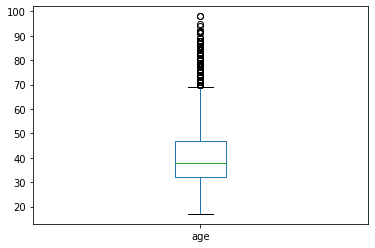

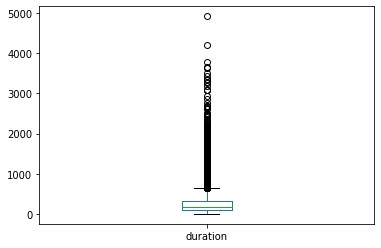

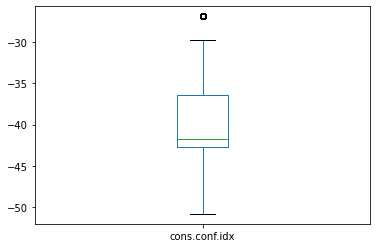

In [134]:
# Boxplot for Age

df.age.plot(kind="box");
plt.show()
df.duration.plot(kind="box");
plt.show()
df['cons.conf.idx'].plot(kind="box");

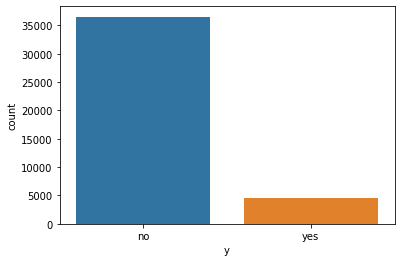

In [10]:
# Get the Distribution of Output Variable

sns.countplot(df.y);

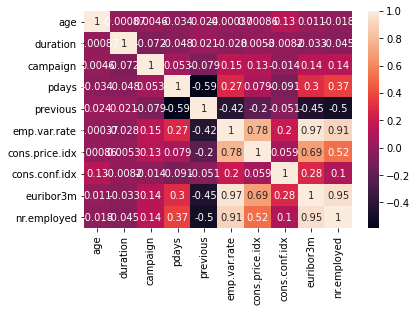

In [11]:
#Pearson’s Correlations, which measures the strength of a linear relationship for Numerical Values
sns.heatmap(df.corr(method='pearson'), annot=True)

In [12]:

# Check the Crosstab

pd.crosstab(df.job, df.y)

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


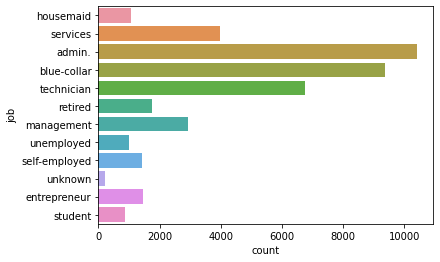

In [136]:
sns.countplot(y='job', data=df);

In [13]:
# Check for Unique Values in Each 'Object' Column

for col in df.select_dtypes(include='object').columns:
    print(col + ':')
    print("\n")
    print("The Unique COlumns are")
    print(df[col].unique())
    print('\n')
    print("The Description of the data is")
    print(df[col].describe())
    print('\n')
    print("The number of occurances in {} is".format(col))
    print(df[col].value_counts())
    print('\n')
    print('\n')

job:


The Unique COlumns are
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


The Description of the data is
count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object


The number of occurances in job is
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64




marital:


The Unique COlumns are
['married' 'single' 'divorced' 'unknown']


The Description of the data is
count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object


The number of occurances in marital is
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64




job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


AxesSubplot(0.125,0.125;0.775x0.755)


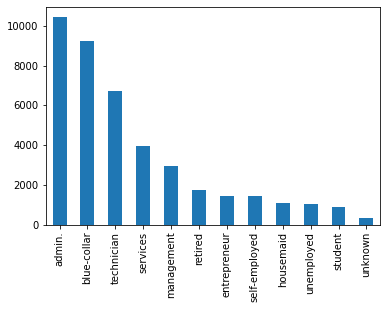



marital:
['married' 'single' 'divorced' 'unknown']


AxesSubplot(0.125,0.125;0.775x0.755)


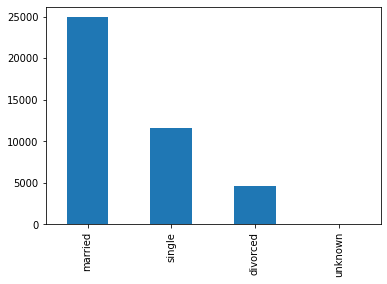



education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


AxesSubplot(0.125,0.125;0.775x0.755)


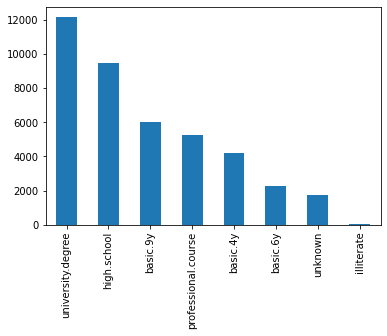



default:
['no' 'unknown' 'yes']


AxesSubplot(0.125,0.125;0.775x0.755)


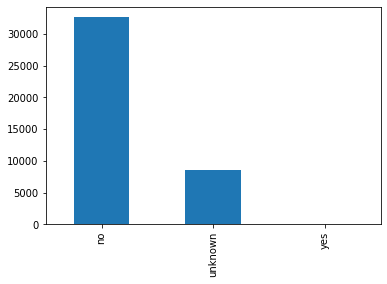



housing:
['no' 'yes' 'unknown']


AxesSubplot(0.125,0.125;0.775x0.755)


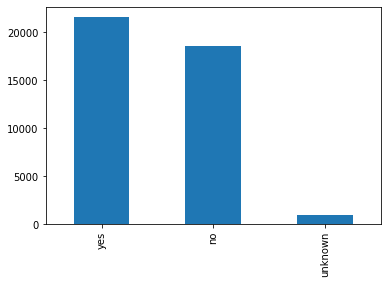



loan:
['no' 'yes' 'unknown']


AxesSubplot(0.125,0.125;0.775x0.755)


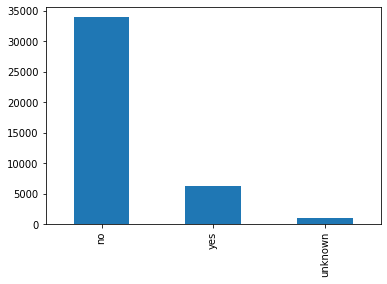



contact:
['telephone' 'cellular']


AxesSubplot(0.125,0.125;0.775x0.755)


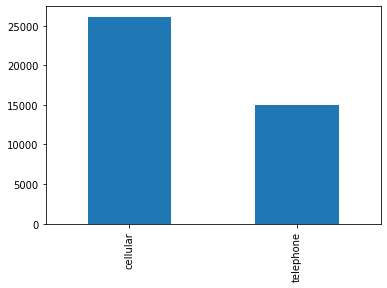



month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


AxesSubplot(0.125,0.125;0.775x0.755)


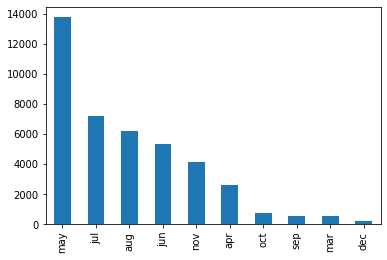



day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']


AxesSubplot(0.125,0.125;0.775x0.755)


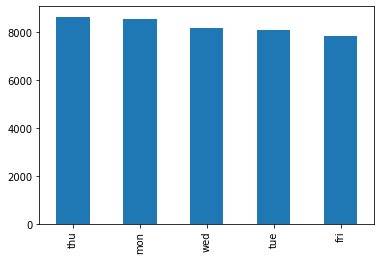



poutcome:
['nonexistent' 'failure' 'success']


AxesSubplot(0.125,0.125;0.775x0.755)


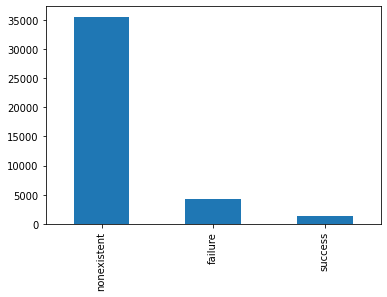



y:
['no' 'yes']


AxesSubplot(0.125,0.125;0.775x0.755)


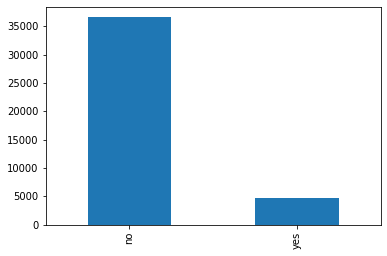

In [14]:
# Plot for Unique Values in Each 'Object' Column

for col in df.select_dtypes(include='object').columns:
    print(col + ':')
    print(df[col].unique())
    print('\n')
    print(df[col].value_counts().plot(kind = 'bar'))
    # To show the plot kinds
    plt.show()
    print('\n')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

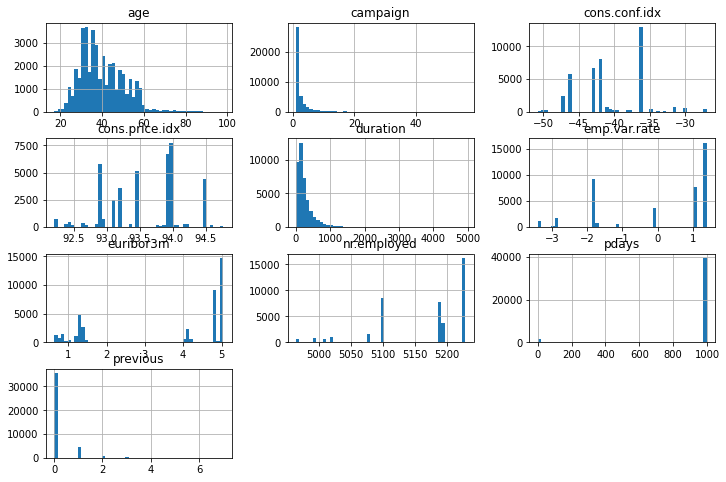

In [15]:
# Check Overall Data Distribution

df.hist(bins=50, figsize=(12, 8));

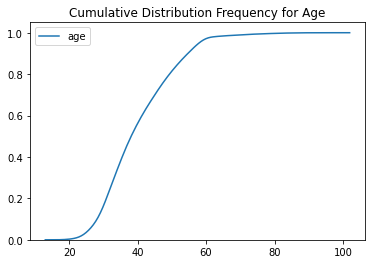

In [142]:
# Plot CDF for Age

sns.kdeplot(df.age,cumulative=True);
plt.title("Cumulative Distribution Frequency for Age");

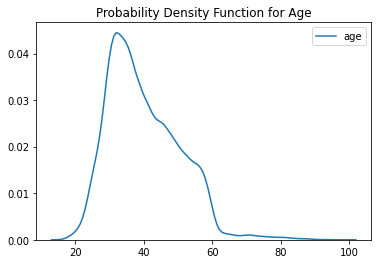

In [143]:
# Plot PDF for Age

sns.kdeplot(df.age,cumulative=False)
plt.title("Probability Density Function for Age");

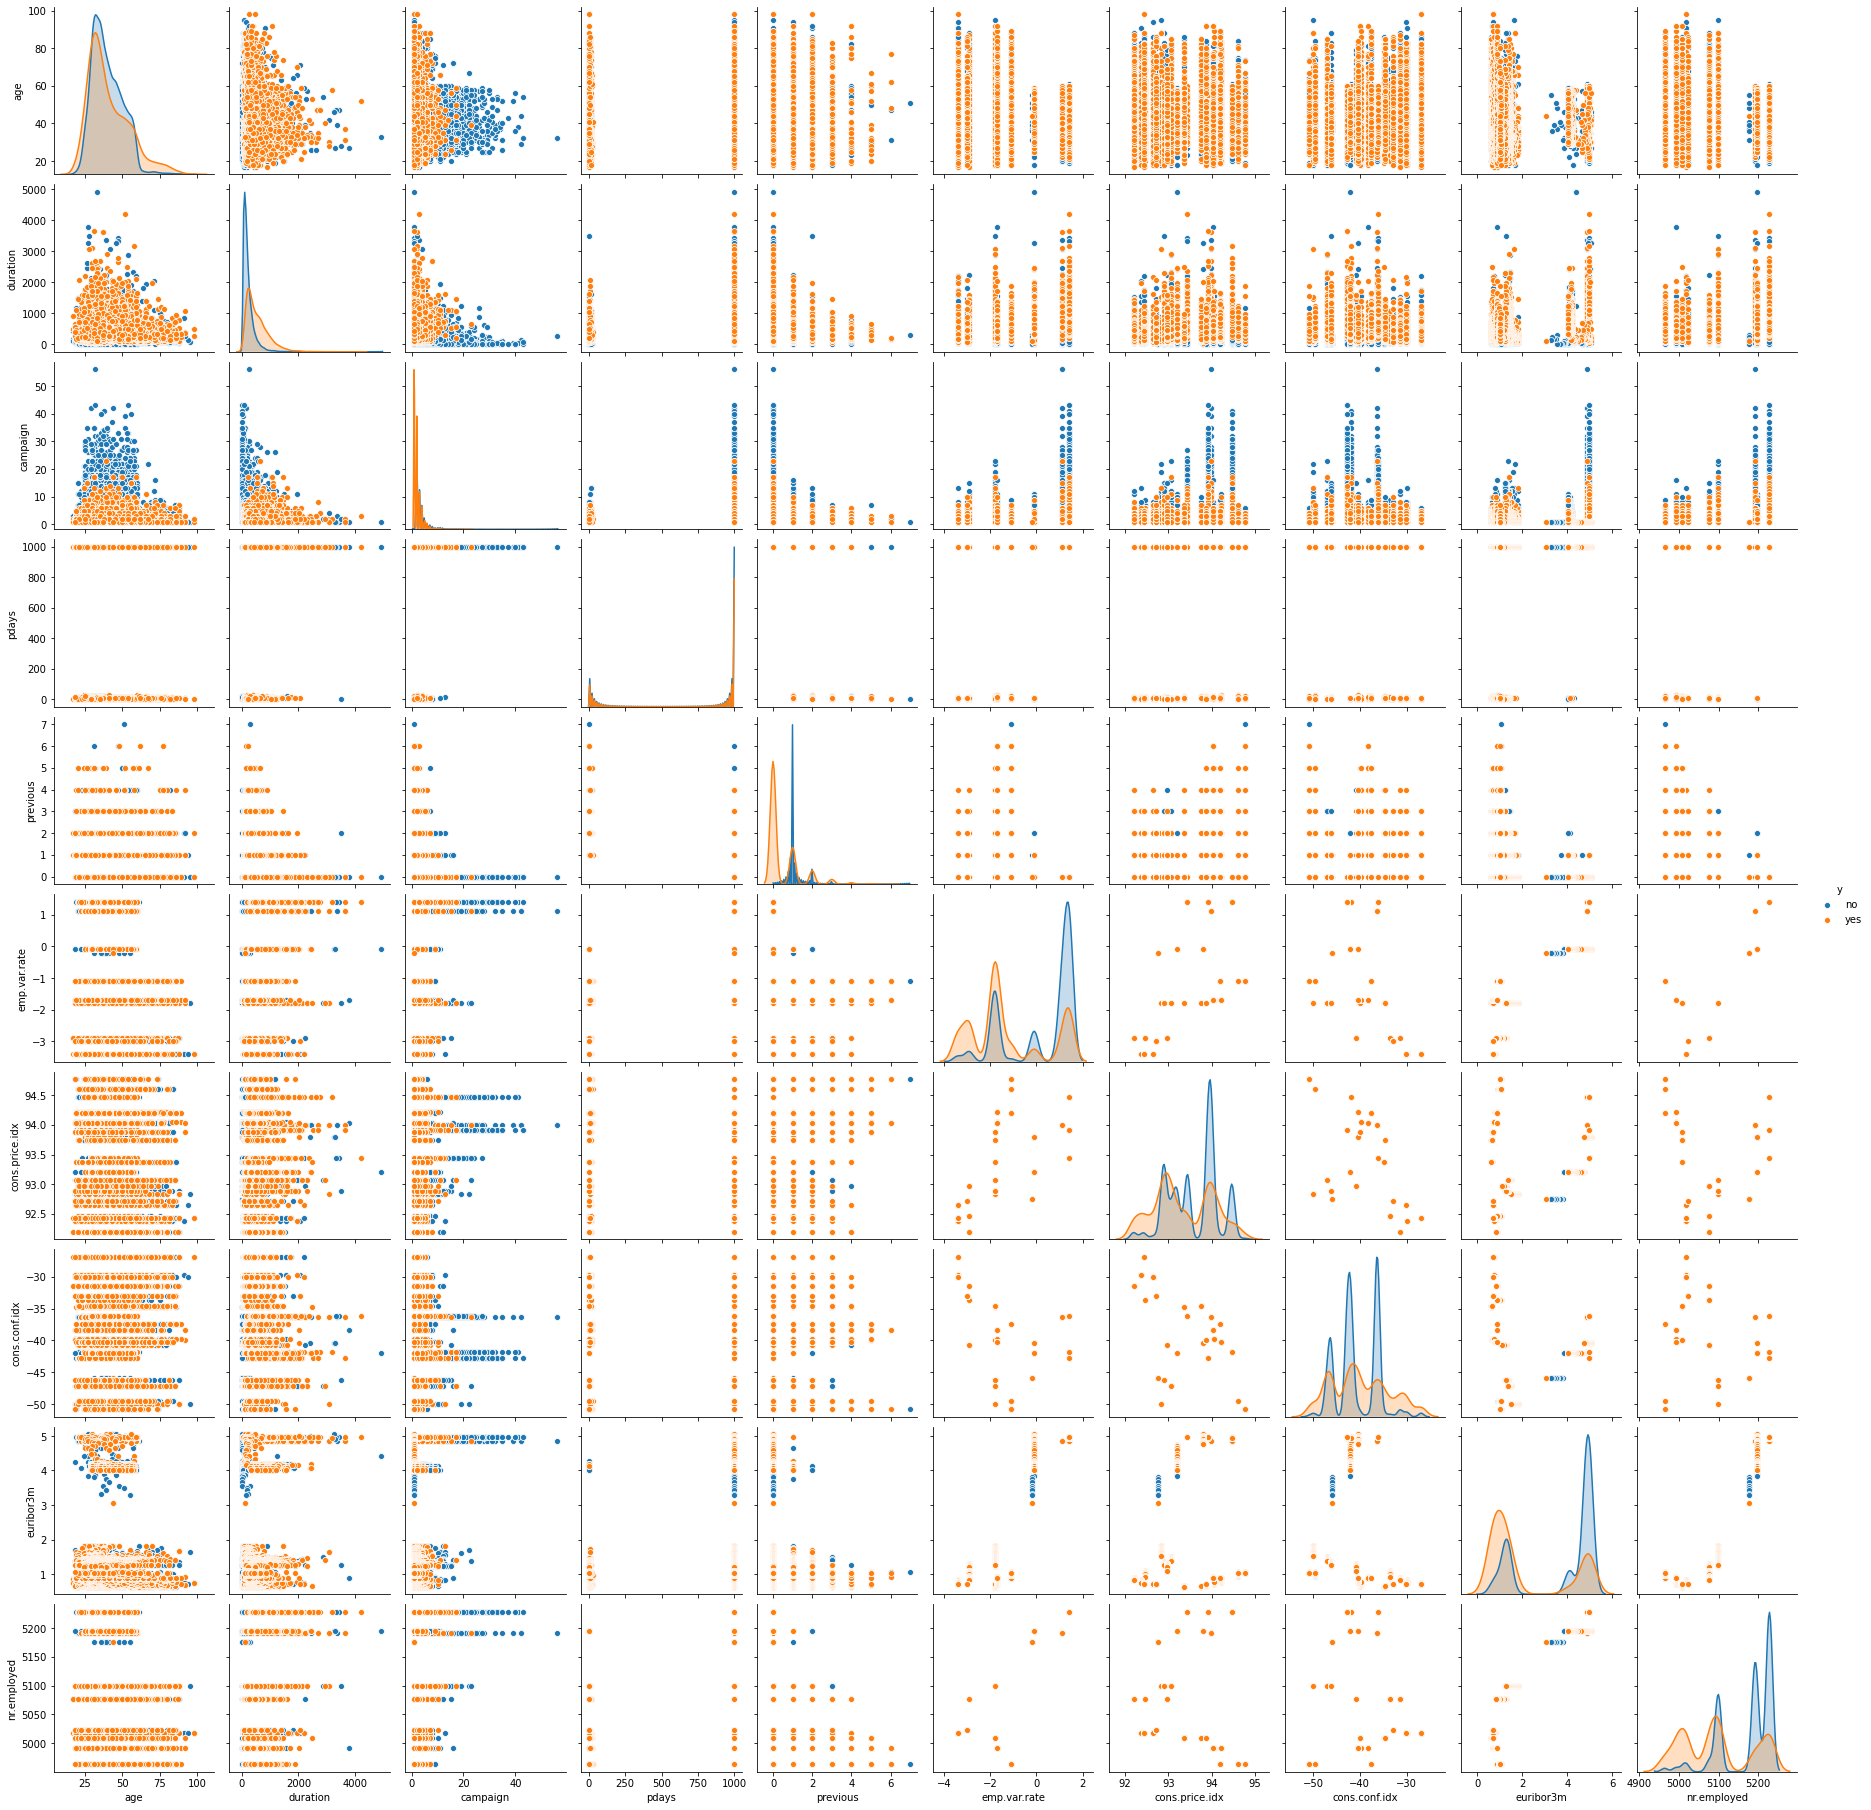

In [18]:
# Use Pairplot to identify relationship between multiple variables

sns.pairplot(df, hue='y')

In [0]:

# Check for Pearson Correlation for Complete Data

dff = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

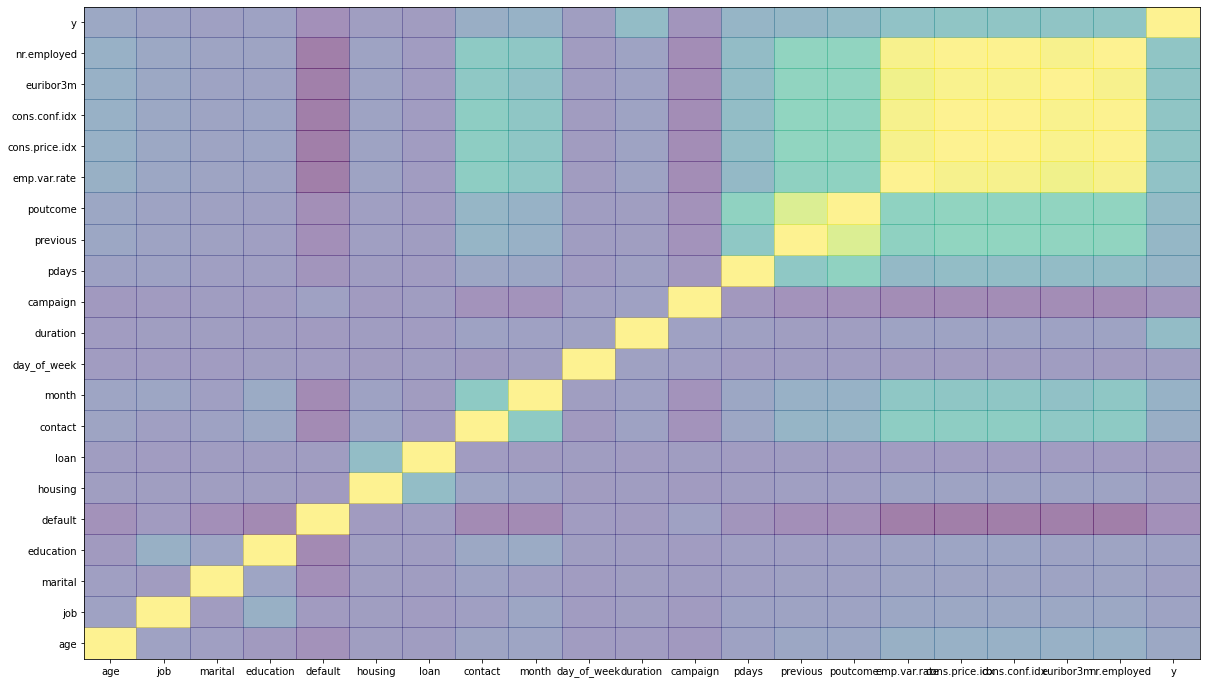

In [20]:
# Plot a Heatmap using Matplotlib

plt.figure(figsize= (20,12))
plt.pcolor(dff, alpha = 0.5)
plt.yticks(np.arange(0.5, len(dff.index), 1), dff.index)
plt.xticks(np.arange(0.5, len(dff.columns), 1), dff.columns)
plt.show()


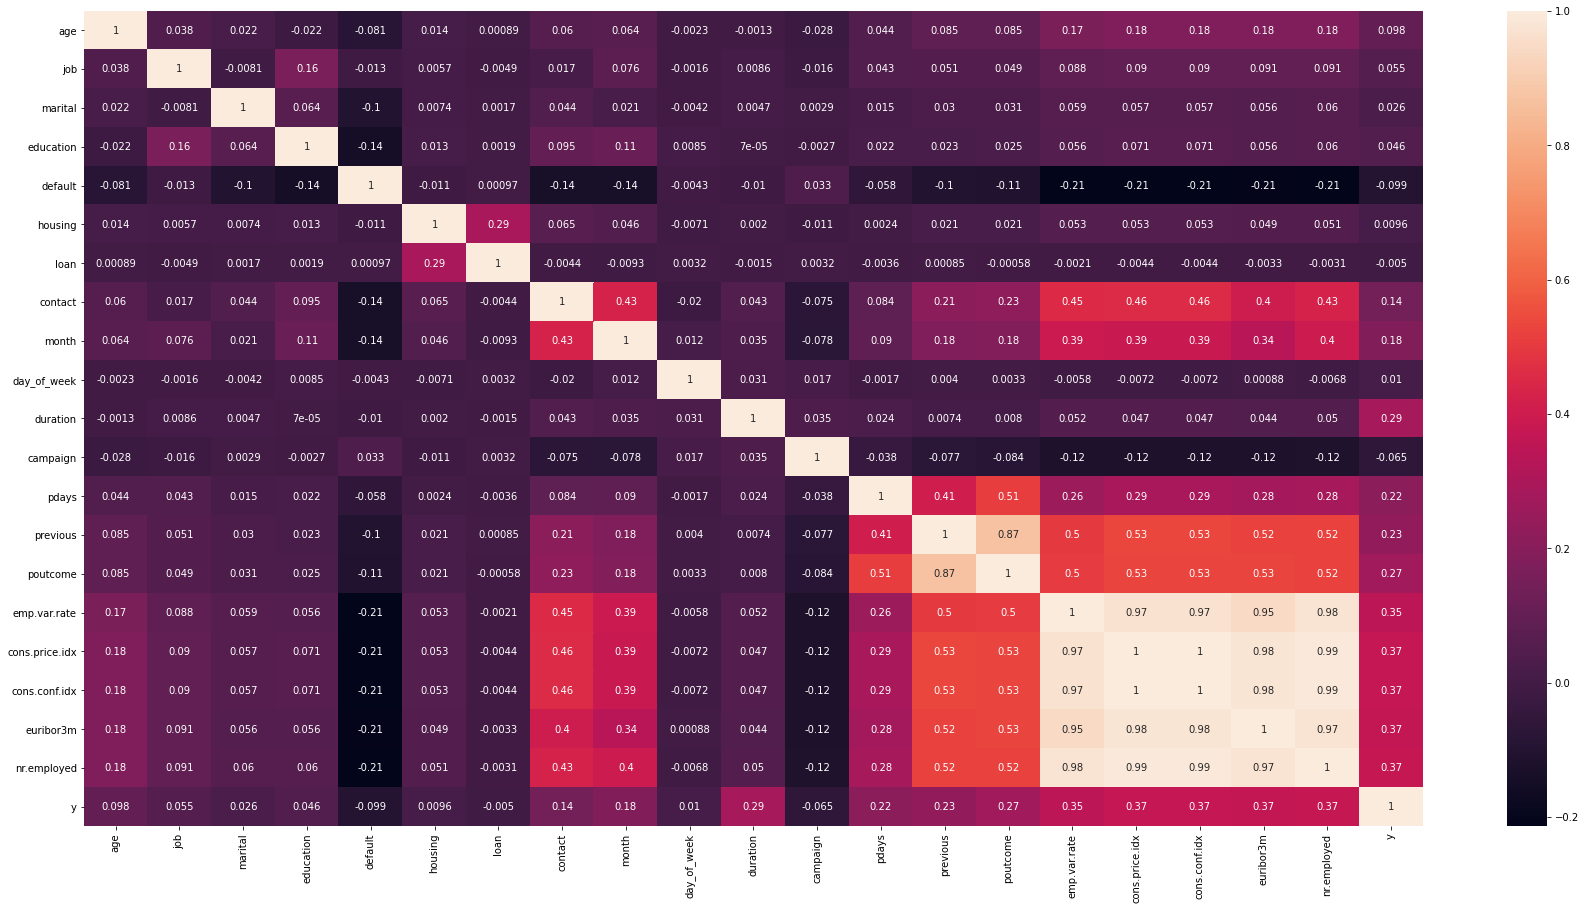

In [21]:
plt.figure(figsize = (30,15))
sns.heatmap(dff, annot=True)
plt.show()

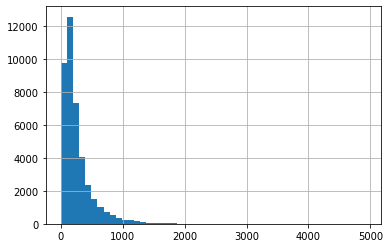

In [22]:
# Plot Histogram of Duration

df['duration'].hist(bins=50)

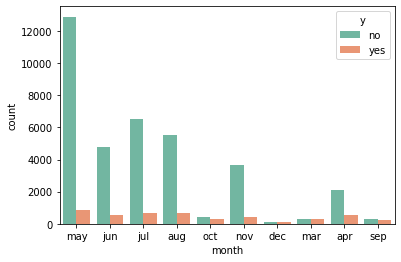

In [23]:
# Ley us Check for Month and y
sns.countplot(x='month', hue='y', data=df,palette="Set2")

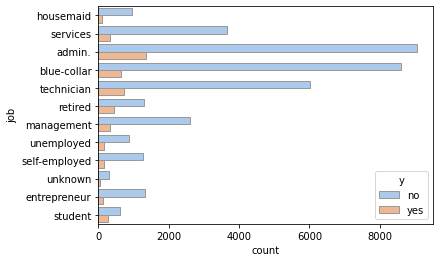

In [24]:
# No of Persons with their Jobtype and whether their loan was approved or not 

sns.countplot(y="job", hue="y", 
            palette="pastel", edgecolor=".6",
            data=df);

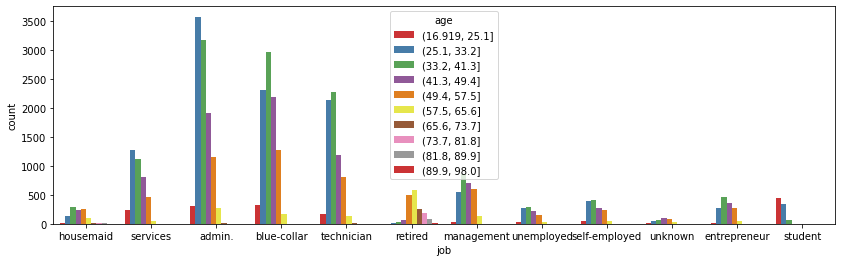

In [25]:
# Plot Job and Age 
plt.figure(figsize=[14,4])
agebin = pd.cut(df['age'], 10)
sns.countplot(x='job', hue=agebin, data=df, palette="Set1")

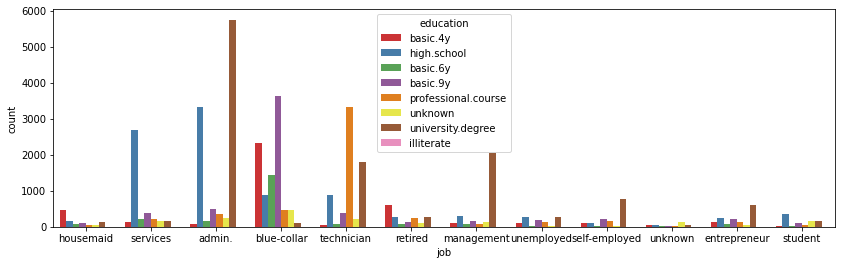

In [26]:
# Plot Job and Deposit 
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='education', data=df, palette="Set1")


In [27]:
# If job = “unemployed” , Term Deposit = "No"
pd.crosstab(df.y, df.job == "unemployed")

job,False,True
y,,
no,35678,870
yes,4496,144


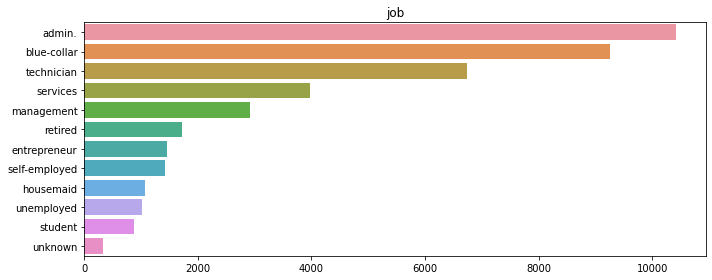

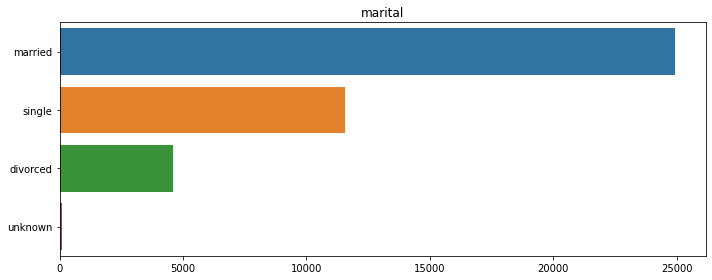

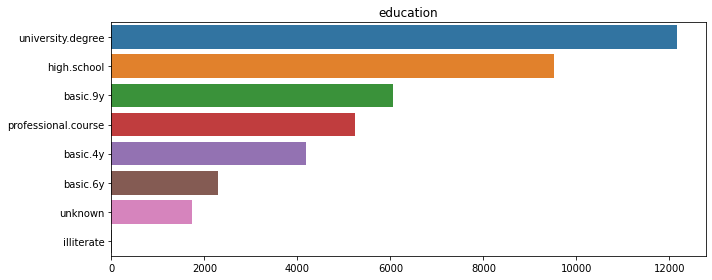

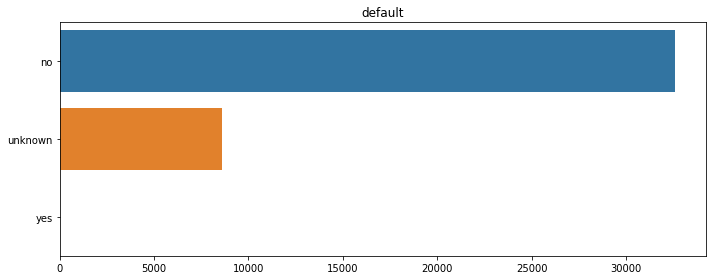

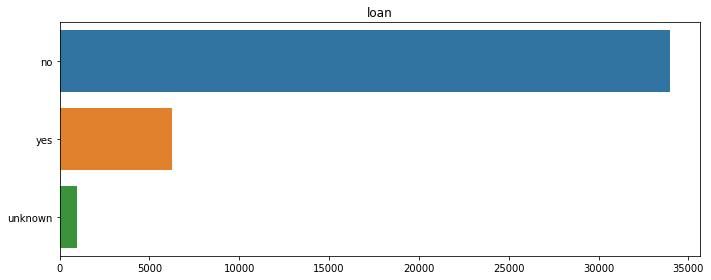

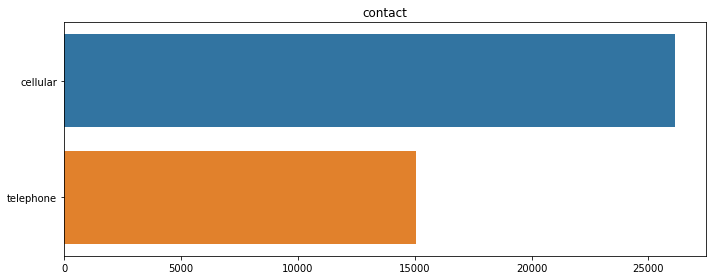

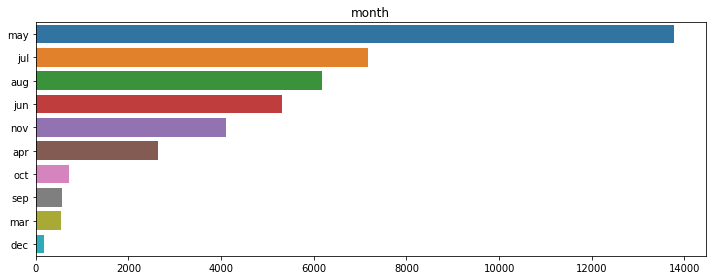

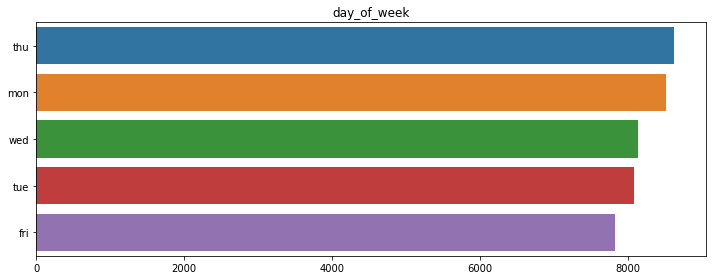

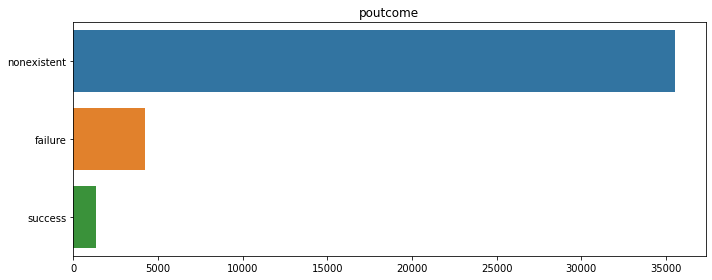

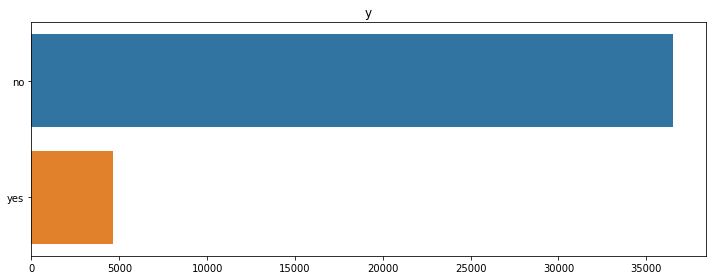

In [28]:
# Plot the Categorical Variables

categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

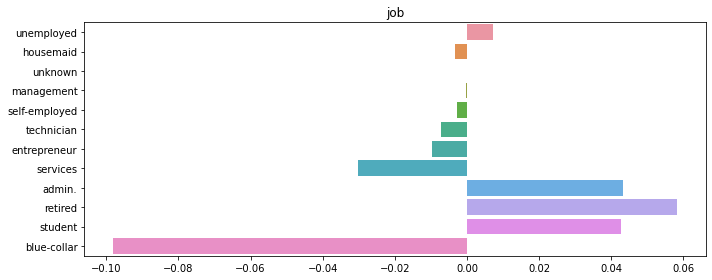

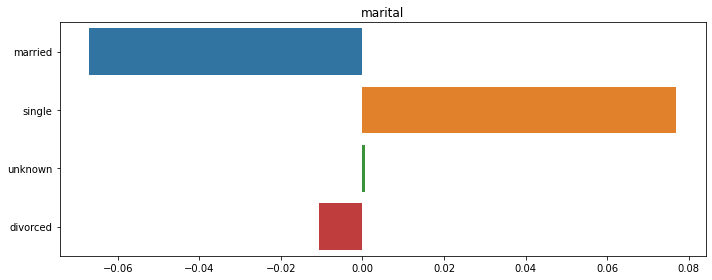

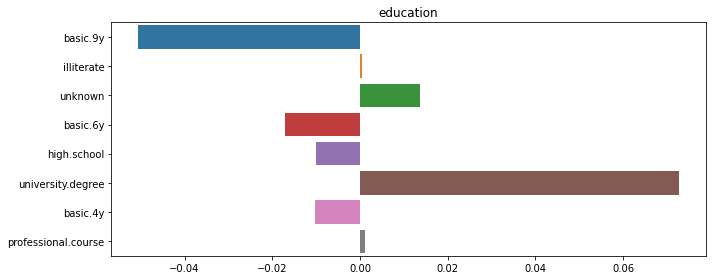

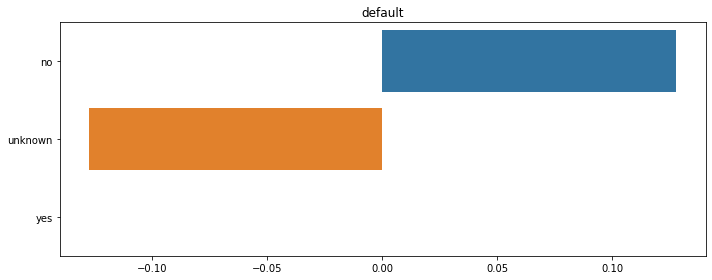

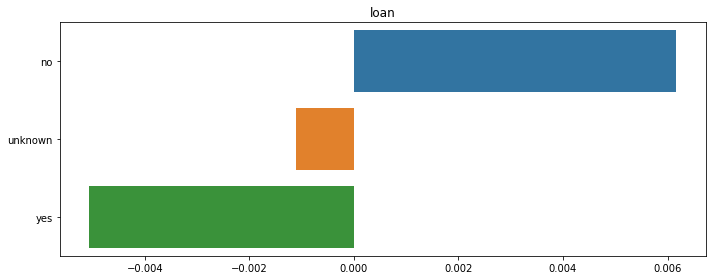

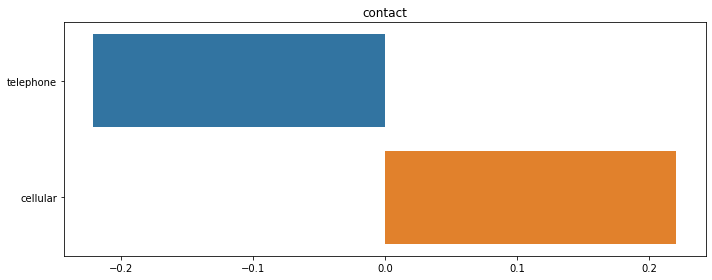

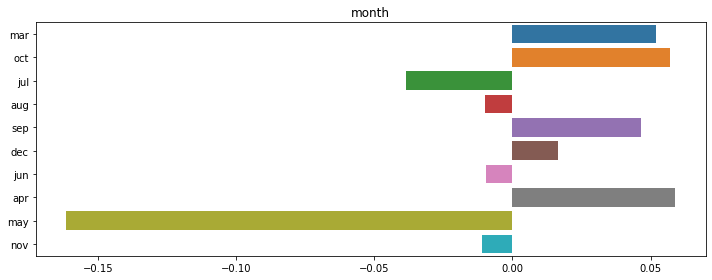

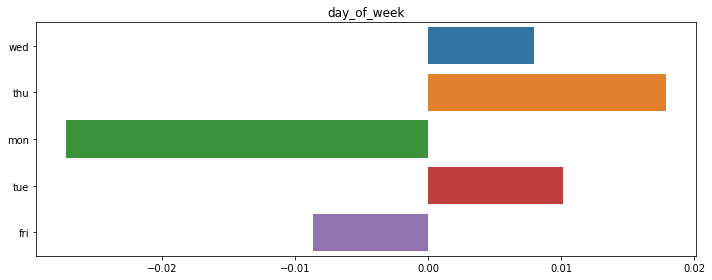

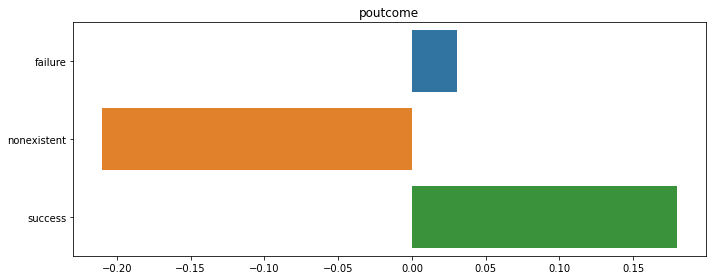

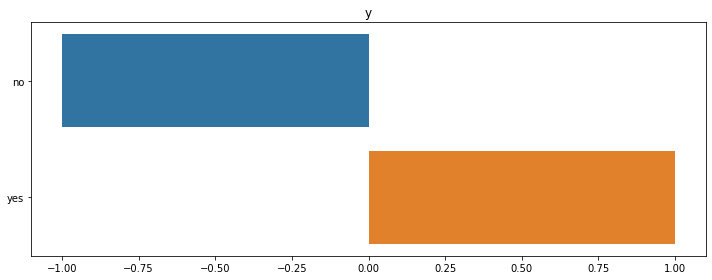

In [29]:
# List of normalized relative frequency of the target class per category

for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [0]:
# Function for Data Imputation

def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx


In [31]:
# Perform Cross Tabulation
cross_tab(df,'job','education')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [0]:
# Impute Jobs based on Top Occurances

df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'


In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


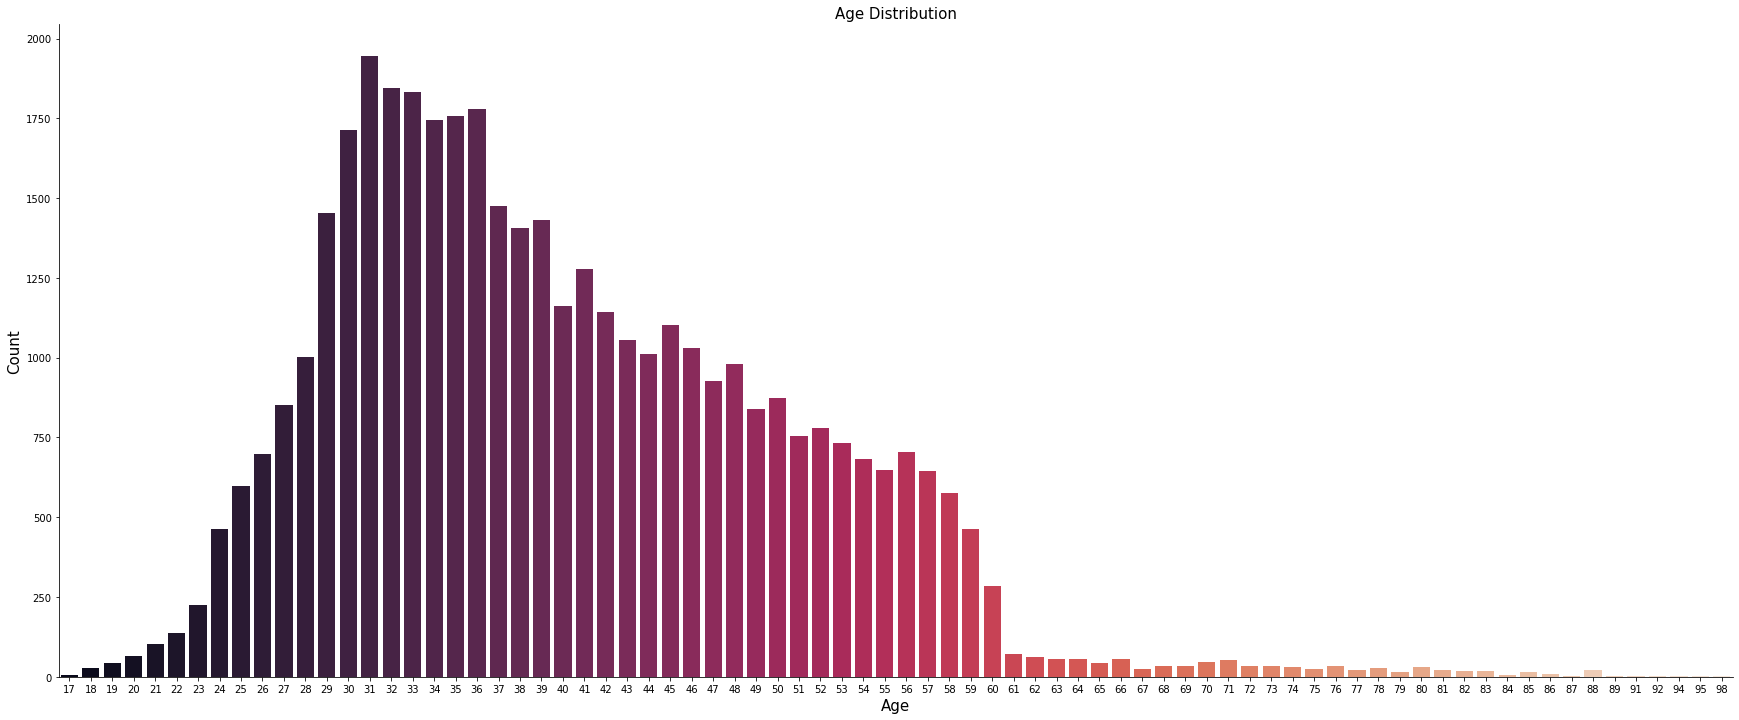

In [34]:
# Distribution of Age

fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

In [35]:
# Bring Age to a Quartile

#function to creat group of ages, this helps because we have 78 differente values here
df2= df.copy()
def age(dataframe):
    q1 = dataframe['age'].quantile(0.25)
    q2 = dataframe['age'].quantile(0.50)
    q3 = dataframe['age'].quantile(0.75)
    dataframe.loc[(dataframe['age'] <= q1), 'age'] = 1
    dataframe.loc[(dataframe['age'] > q1) & (dataframe['age'] <= q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] > q2) & (dataframe['age'] <= q3), 'age'] = 3
    dataframe.loc[(dataframe['age'] > q3), 'age'] = 4 
    print (q1, q2, q3)
    return dataframe
age(df2);

df2.head(10)


32.0 38.0 47.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


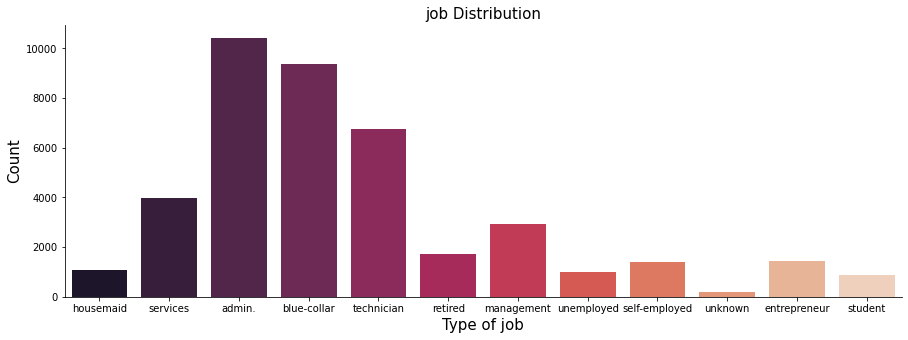

In [36]:
# Get the Distribution of Job

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job',  palette="rocket", data = df2)
ax.set_xlabel('Type of job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('job Distribution', fontsize=15)
sns.despine()


In [0]:
# Encode Job Values

labelencoder_X = LabelEncoder()
labelencoder_X.fit(df2['job'])
df2['job'] = labelencoder_X.transform(df2['job'])

In [38]:
df2.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


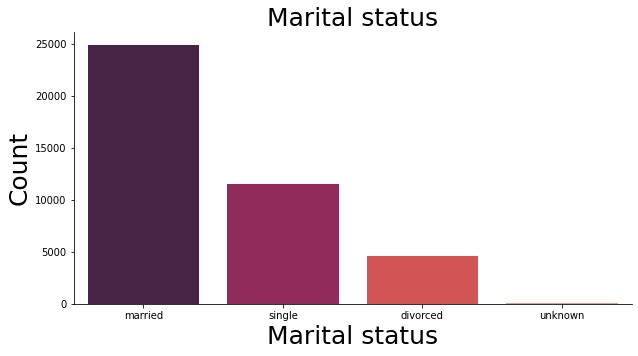

In [39]:
# Check the Distribution of Marital Status

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital',  palette="rocket", data = df2)
ax.set_xlabel('Marital status', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Marital status', fontsize=25)
sns.despine()

In [0]:
# Encode Marital Status

labelencoder_X.fit(df2['marital'])
df2['marital'] = labelencoder_X.transform(df2['marital'])

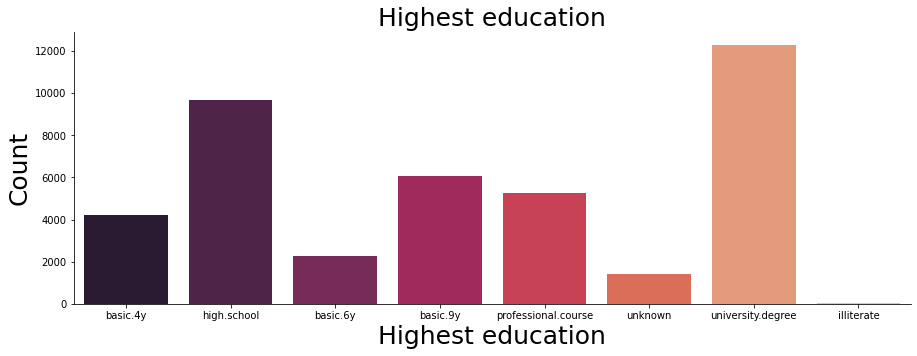

In [41]:
# Get the Distribution of Education

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education',  palette="rocket", data = df2)
ax.set_xlabel('Highest education', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Highest education', fontsize=25)
sns.despine()

In [0]:
# Encode Education

labelencoder_X.fit(df2['education'])
df2['education'] = labelencoder_X.transform(df2['education'])

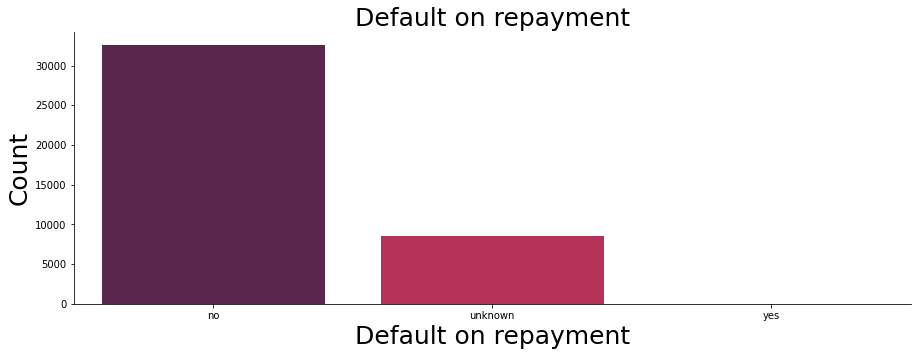

In [43]:
# Get default values

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'default',  palette="rocket", data = df2)
ax.set_xlabel('Default on repayment', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Default on repayment', fontsize=25)
sns.despine()


In [0]:
# Encoding the Values

labelencoder_X.fit(df2['default'])
df2['default'] = labelencoder_X.transform(df2['default'])

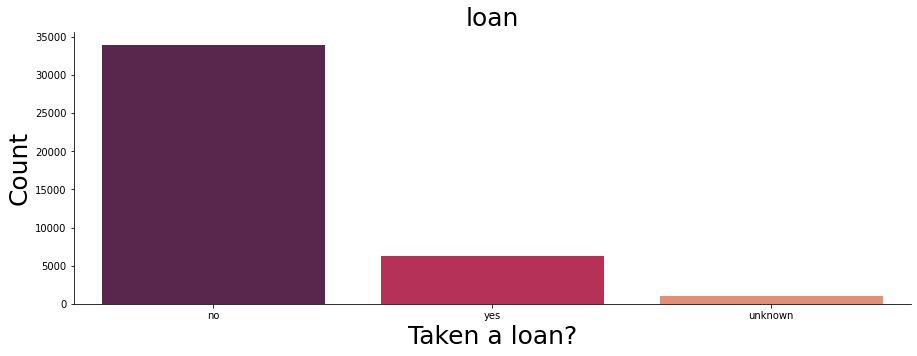

In [45]:
# Taken a Loan or Not

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'loan',  palette="rocket", data = df2)
ax.set_xlabel('Taken a loan?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('loan', fontsize=25)
sns.despine()

In [0]:
# Encoding

labelencoder_X.fit(df2['loan'])
df2['loan'] = labelencoder_X.transform(df2['loan'])

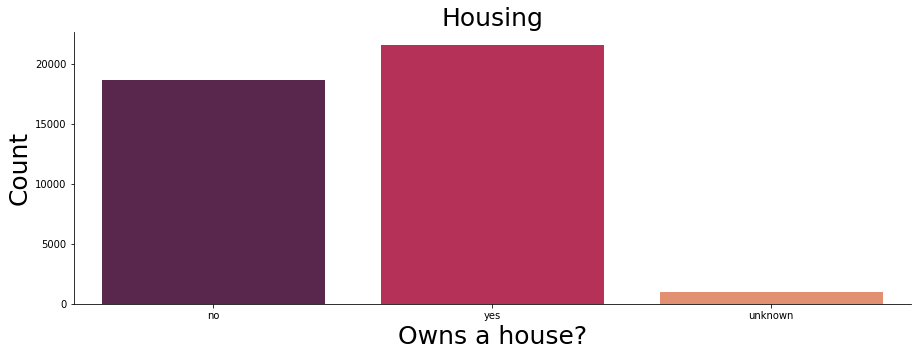

In [47]:
# Get Housing Distribution

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'housing',  palette="rocket", data = df2)
ax.set_xlabel('Owns a house?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Housing', fontsize=25)
sns.despine()

In [0]:
# Encoding the Values

labelencoder_X.fit(df2['housing'])
df2['housing'] = labelencoder_X.transform(df2['housing'])

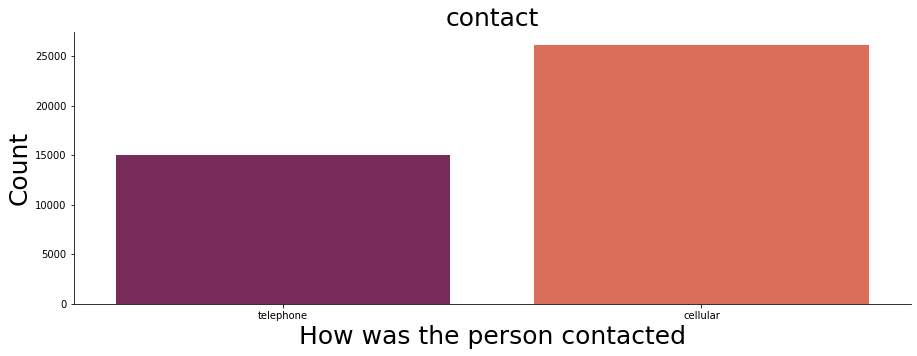

In [49]:
# Way of Contact

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'contact',  palette="rocket", data = df2)
ax.set_xlabel('How was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('contact', fontsize=25)
sns.despine()

In [0]:
# Encoding Contact data

labelencoder_X.fit(df2['contact'])
df2['contact'] = labelencoder_X.transform(df2['contact'])

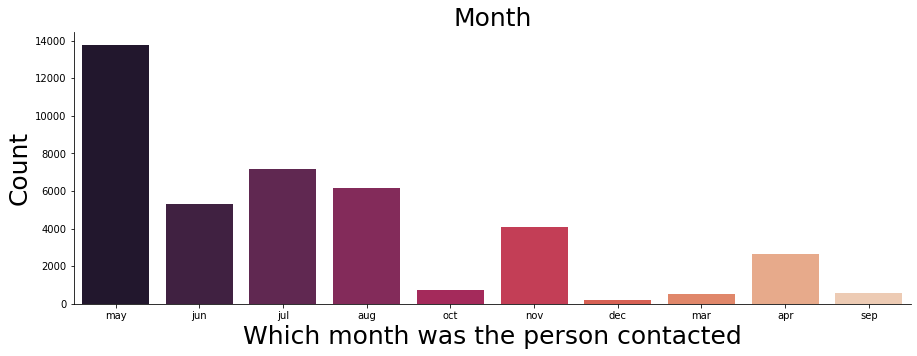

In [51]:
# Check the Monthly Distribution of Data

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'month',  palette="rocket", data = df2)
ax.set_xlabel('Which month was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Month', fontsize=25)
sns.despine()

In [0]:
# Encode Data

labelencoder_X.fit(df2['month'])
df2['month'] = labelencoder_X.transform(df2['month'])

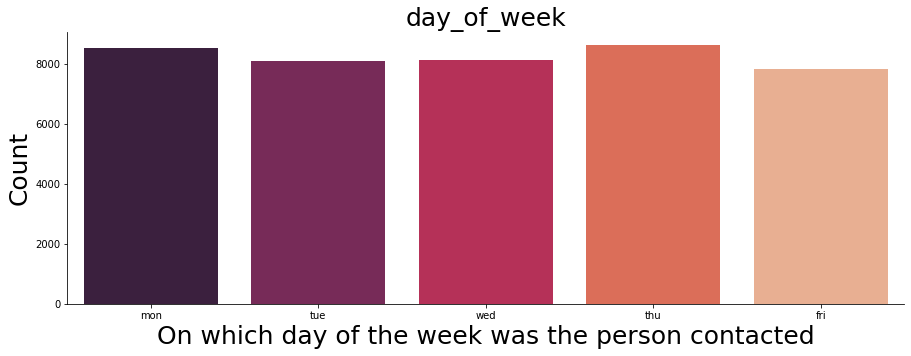

In [53]:
# Check Which days of week the calls are high

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'day_of_week',  palette="rocket", data = df2)
ax.set_xlabel('On which day of the week was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('day_of_week', fontsize=25)
sns.despine()

In [0]:
# Encoding the Days of week

labelencoder_X.fit(df2['day_of_week'])
df2['day_of_week'] = labelencoder_X.transform(df2['day_of_week'])

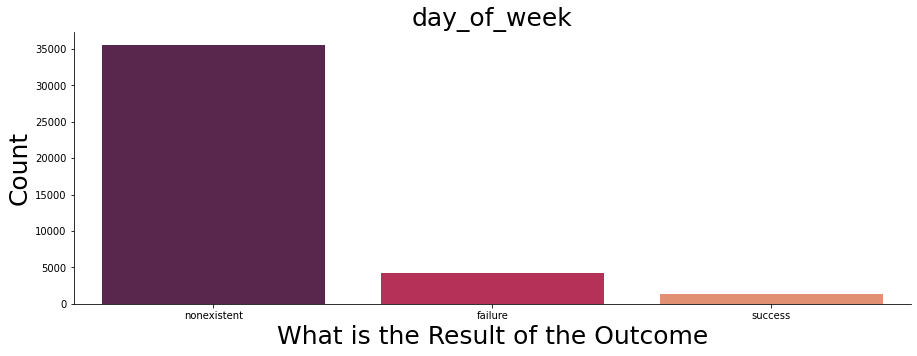

In [55]:
# Check the POutcome distribution

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'poutcome',  palette="rocket", data = df2)
ax.set_xlabel('What is the Result of the Outcome', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('day_of_week', fontsize=25)
sns.despine()

In [0]:
# Encode it

labelencoder_X.fit(df2['poutcome'])
df2['poutcome'] = labelencoder_X.transform(df2['poutcome'])

In [57]:
# Check If all categorical Variables are Converted

df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,4,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,4,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
# Encode the Y Variable

Outputs = {'no' : 0, 'yes' : 1}
df2['y'] = df2['y'].map(Outputs)

In [59]:
df2.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,4,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,3,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,4,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,3,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,4,5,1,5,0,2,0,0,7,0,239,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


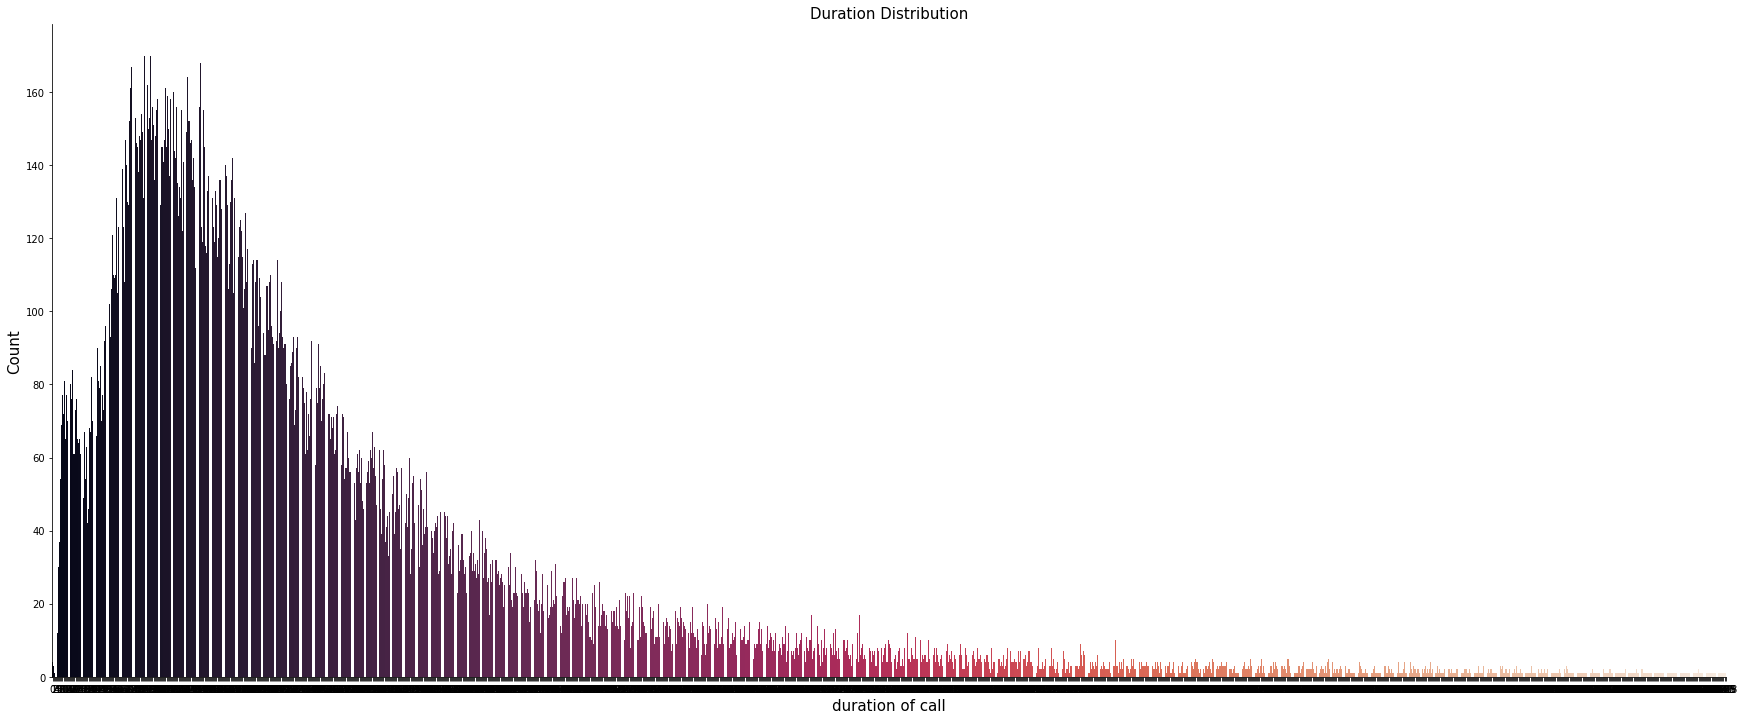

In [60]:
# Now Check the Distribution Duration

fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'duration',  palette="rocket", data = df2)
ax.set_xlabel('duration of call', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

In [61]:
def remove_outlier_upper(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound for Duration are 0 and', fence_high, 'respectively')
    return df_out
df2 = remove_outlier_upper(df2, 'duration')


IQR lower bound and upper bound for Duration are 0 and 644.5 respectively


In [62]:
#Grouping duration

df2= df2.copy()
def duration(dataframe):
    q1 = dataframe['duration'].quantile(0.25)
    q2 = dataframe['duration'].quantile(0.50)
    q3 = dataframe['duration'].quantile(0.75)
    dataframe.loc[(dataframe['duration'] <= q1), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > q1) & (dataframe['duration'] <= q2), 'duration'] = 2
    dataframe.loc[(dataframe['duration'] > q2) & (dataframe['duration'] <= q3), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > q3), 'duration'] = 4 
    print (q1, q2, q3)
    return dataframe
duration(df2)

df2['duration'].head(3)


97.0 167.0 277.0


0    3
1    2
2    3
Name: duration, dtype: int64

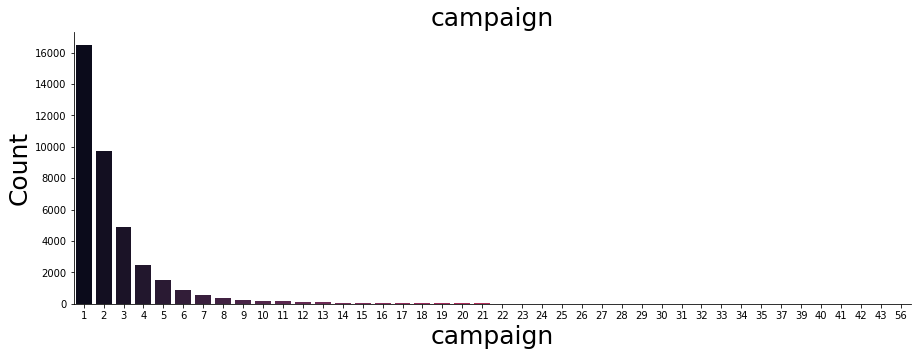

In [63]:
# Test the Distributon of Campaign

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'campaign',  palette="rocket", data = df2)
ax.set_xlabel('campaign', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('campaign', fontsize=25)
sns.despine()

In [64]:
# Remove Outliers in Campaign

def remove_outlier_campaign(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
df2 = remove_outlier_campaign(df2, 'campaign')

IQR lower bound and upper bound are 0 and 6.0 respectively


In [65]:
# Check the first 7 dataframe

df2.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,4,7,1,3,1,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,4,7,1,3,0,0,2,1,6,1,4,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,3,7,1,2,1,0,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,4,0,1,5,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [66]:
# Group Pdays

df2.loc[(df2['pdays'] == 999), 'pdays'] = 1
df2.loc[(df2['pdays'] > 0) & (df2['pdays'] <= 10), 'pdays'] = 2
df2.loc[(df2['pdays'] > 10) & (df2['pdays'] <= 20), 'pdays'] = 3
df2.loc[(df2['pdays'] > 20) & (df2['pdays'] != 999), 'pdays'] = 4 
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,3,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,4,7,1,3,1,0,0,1,6,1,2,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,3,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,2,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,4,7,1,3,0,0,2,1,6,1,4,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [0]:
# Group euribor3m

df2.loc[(df2['euribor3m'] < 1), 'euribor3m'] = 1
df2.loc[(df2['euribor3m'] > 1) & (df2['euribor3m'] <= 2), 'euribor3m'] = 2
df2.loc[(df2['euribor3m'] > 2) & (df2['euribor3m'] <= 3), 'euribor3m'] = 3
df2.loc[(df2['euribor3m'] > 3) & (df2['euribor3m'] <= 4), 'euribor3m'] = 4
df2.loc[(df2['euribor3m'] > 4), 'euribor3m'] = 5

## Training Our Model

In [0]:

X = df2.drop(['y'], axis= 1)
y = df2['y']

In [144]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [69]:
X.shape

(35050, 20)

In [70]:
y.shape

(35050,)

In [0]:
# Importing ML Libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26287, 20), (8763, 20), (26287,), (8763,))

In [0]:
# Try with Support Vector Classifier

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Model Fit

svc_model = SVC()
svc_model.fit(X_train, y_train)

# Model Evaluation

y_pred = svc_model.predict(X_test)

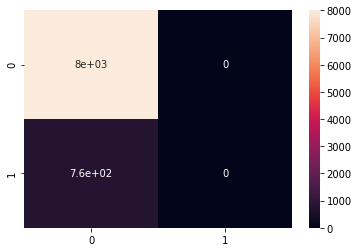

In [75]:
# Plot Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [0]:
# Scaling the Range

min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

min_train = X_test.min()
range_train = (X_test - min_train).max()
X_test_scaled = (X_test - min_train)/range_train

In [77]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svc_model.predict(X_test_scaled)

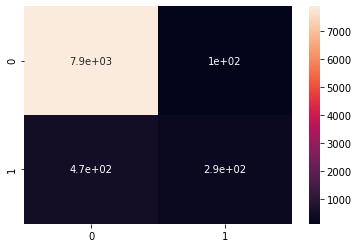

In [79]:
# Plot Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8004
           1       0.74      0.38      0.50       759

    accuracy                           0.93      8763
   macro avg       0.84      0.68      0.73      8763
weighted avg       0.93      0.93      0.92      8763



Model Improvement using Parameter Tuning

In [0]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose=4)

In [82]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   6.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.926, total=   6.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.928, total=   6.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.924, total=   6.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   6.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.927, total=   5.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.926, total=   5.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.928, total=   5.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.925, total=   5.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.925, total=   5.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 10.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [83]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [0]:
grid_pred = grid.predict(X_test_scaled)

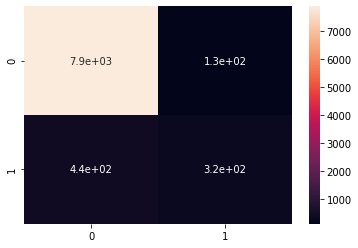

In [85]:
# Confusion Matrix

cm = confusion_matrix(y_test, grid_pred)
sns.heatmap(cm, annot=True)

In [86]:
# Print the Classification Report 

print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8004
           1       0.71      0.42      0.53       759

    accuracy                           0.94      8763
   macro avg       0.83      0.70      0.75      8763
weighted avg       0.93      0.94      0.93      8763



k=1 90.280363
k=2 92.075923
k=3 92.079743
k=4 92.418304
k=5 92.319400
k=6 92.562857
k=7 92.608508
k=8 92.657965
k=9 92.692216
k=10 92.692210
k=11 92.772098
k=12 92.760681
k=13 92.802534
k=14 92.794922
k=15 92.775896
k=16 92.798716
k=17 92.840564
k=18 92.760670
k=19 92.863378
k=20 92.813929
k=21 92.836749
k=22 92.821541
k=23 92.909030
k=24 92.756863
k=25 92.813933
The optimal number of neighbors is 22 with 92.909030


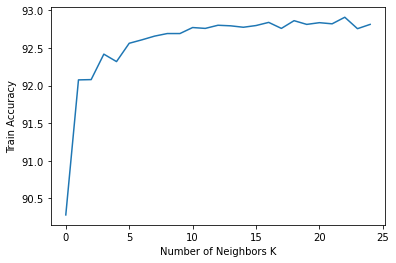

In [87]:
# try with KNN Classifier

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# KNN classifier
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %f" % (k_value, scores.mean()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %f" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()


In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
knnpred = knn.predict(X_test_scaled)

print(accuracy_score(y_test, knnpred)*100)

92.87915097569326


In [89]:
# Use Decision Tree

# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [90]:
# Check the accuracy score of the prediction for the test set
model.score(X_test, y_test)*100

90.30012552778729

In [0]:
# Exporting the Tree

# Import the graphical visualization export function
from sklearn.tree import export_graphviz
from sklearn import tree


# Apply Decision Tree model to fit Features to the Target
model.fit(X_train,y_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")


In [0]:
dotfile = open("tree.dot", 'w')
tree.export_graphviz(model, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

In [0]:
# Importing the Metrics

# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Import the function to calculate precision score
from sklearn.metrics import precision_score


In [94]:
# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, random_state=42, class_weight = "balanced")
# Fit it to the training component
model_depth_7_b.fit(X_train_scaled,y_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(X_test_scaled)
# Print the recall score for the balanced model
print(recall_score(y_test,prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(y_test,prediction_b))

0.8853754940711462
0.8546067875153333


In [95]:
# Calculating and Sorting Important Features

# Calculate feature importances
feature_importances = model_depth_7_b.feature_importances_

# Create a list of features: done
feature_list = list(X_train.columns)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
emp.var.rate,0.547688
duration,0.177682
nr.employed,0.108400
month,0.078560
poutcome,0.017156
cons.price.idx,0.014274
education,0.010862
campaign,0.009508
default,0.008661
day_of_week,0.006866


In [96]:
# Calculating and Sorting Important Features

# Calculate feature importances
feature_importances = model_depth_7_b.feature_importances_

# Create a list of features: done
feature_list = list(X_train.columns)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
emp.var.rate,0.547688
duration,0.177682
nr.employed,0.108400
month,0.078560
poutcome,0.017156
cons.price.idx,0.014274
education,0.010862
campaign,0.009508
default,0.008661
day_of_week,0.006866


In [0]:
# Selecting important features

# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
X_train_selected = X_train[selected_list]
X_test_selected = X_test[selected_list]

In [98]:
# Only Top Feature models are taken into Consideration

X_train_selected.head()


,education,month,duration,poutcome,emp.var.rate,cons.price.idx,nr.employed
27619,5,7,4,0,-0.1,93.200,5195.8
8141,3,4,3,1,1.4,94.465,5228.1
134,6,6,3,1,1.1,93.994,5191.0
8802,2,4,4,1,1.4,94.465,5228.1
8138,2,4,2,1,1.4,94.465,5228.1


In [99]:
# Develop and test the best model

# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth =8, min_samples_leaf =150, class_weight ='balanced', random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(X_train_selected, y_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(X_test_selected)

# Print the general accuracy of the model_best
print("The Accuracy is ",model_best.score(X_test_selected, y_test) * 100)

# Print the recall score of the model predictions
print("The Recall Score is ", recall_score(y_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print("The ROC/AUC Score is ", roc_auc_score(y_test, prediction_best) * 100)


The Accuracy is  81.54741526874358
The Recall Score is  88.66930171277997
The ROC/AUC Score is  84.77068284039798


# Building a Large Scale ML Model

In [0]:
# Importing the Libraries

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [101]:
# Stochaistic Gradient Descent

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train)*100, 2)
print("The Accuracy of SGD is ", acc_sgd)

The Accuracy of SGD is  91.36


In [102]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("The Accuracy Score of Random Forest is ", acc_random_forest)

The Accuracy Score of Random Forest is  99.75


In [103]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7796,  208],
       [ 398,  361]])

In [104]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
print("The accuracy of Logistic Regression is ", acc_log)


The accuracy of Logistic Regression is  92.86


In [105]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
print("The Accuracy of KNN model is ", acc_knn)


The Accuracy of KNN model is  95.04


In [106]:
# Gaussian NB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100, 2)
print("The Accuracy of Gaussian Naive Bayes is ",acc_gaussian)


The Accuracy of Gaussian Naive Bayes is  86.15


In [107]:
# Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100, 2)
print("The Accuracy of Perceptron is ", acc_perceptron)

The Accuracy of Perceptron is  91.36


In [108]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_svc = round(linear_svc.score(X_train, y_train)*100, 2)
print("The Accuracy of Linear Support Vector Classifier is ", acc_svc)


The Accuracy of Linear Support Vector Classifier is  91.54


In [109]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)
print("The Accuracy of Decision Tree Model is", acc_decision_tree)

The Accuracy of Decision Tree Model is 99.75


In [110]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
99.75,Random Forest
99.75,Decision Tree
95.04,KNN
92.86,Logistic Regression
91.54,Support Vector Machines
91.36,Perceptron
91.36,Stochastic Gradient Decent
86.15,Naive Bayes


In [111]:
# Perform Cross Validation here to check the SD

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, X_train, y_train, cv=10, scoring="accuracy")
print('Scores :', score)
print("\n")
print('Mean :',score.mean())
print("\n")
print('Standard Deviation :', score.std())

Scores : [0.92544694 0.92925067 0.92468619 0.93647775 0.93001141 0.93077216
 0.92582731 0.92998478 0.93150685 0.93226788]


Mean : 0.9296231935912109


Standard Deviation : 0.003398406015706658


In [112]:
# Feature Importance analysis using Random Forest

importances = pd.DataFrame({'Features': X_train.columns, 'Importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.head(10)

,Importance
Features,
duration,0.112
job,0.086
day_of_week,0.085
nr.employed,0.083
education,0.074
poutcome,0.072
campaign,0.062
age,0.059
euribor3m,0.055


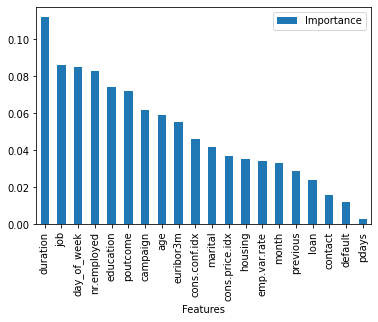

In [113]:
# Visualisation

importances.plot.bar();

In [114]:
# Trying with Best Model - Random Forest Again

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
print("The Accuracy of the Random Forest Model is ", acc_random_forest)

# Using oob (Out of Bag Estimates) to evaluate on getting training size as test size

print("oob score:", round(random_forest.oob_score_, 4)*100)

The Accuracy of the Random Forest Model is  99.75
oob score: 92.99


In [0]:
# Perform Hyperparameter Tuning for Random Forest

param_grid = {'criterion':['gini','entropy'], 'min_samples_leaf':[1,5,10,25,50,70], 'min_samples_split': [2,4,10,12,16,18,25,35], 
             'n_estimators': [100,400,700,1000,1500]}

In [116]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, oob_score=True, max_features='auto', random_state=1, n_jobs= -1)
clf = GridSearchCV(estimator= rf, param_grid= param_grid, n_jobs= -1)
rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=1, min_samples_split=10,
                            oob_score=True, random_state=1, n_jobs = -1)
rf.fit(X_train, y_train)
rf.predict(X_test)
print('oob_scores :', round(rf.oob_score_, 4)*100, '%')

oob_scores : 93.32000000000001 %


In [117]:
# Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, predictions)
cm

array([[23536,   480],
       [ 1267,  1004]])

In [118]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score
print('Precsion Score :', precision_score(y_train, predictions))
print('Recall Score :', recall_score(y_train, predictions))

Precsion Score : 0.6765498652291105
Recall Score : 0.4420959929546455


In [119]:
#F-score is computed with the harmonic mean of Precision and Recall

from sklearn.metrics import f1_score
f1 = f1_score(y_train,predictions)
print(f1)

#  F-score is not perfect, because it favors classifiers that have a similar precision and recall

0.5347536617842877


In [0]:
from sklearn.metrics import precision_recall_curve
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:, 1]

In [0]:
precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [0]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label='precision', linewidth = 5)
    plt.plot(threshold, recall[:-1], 'b', label='recall', linewidth = 5)
    plt.xlabel('threshold', fontsize = 18)
    plt.legend(loc = 'upper right', fontsize = 18)
    plt.title("Precision and Recall")
    plt.ylim([0,1])


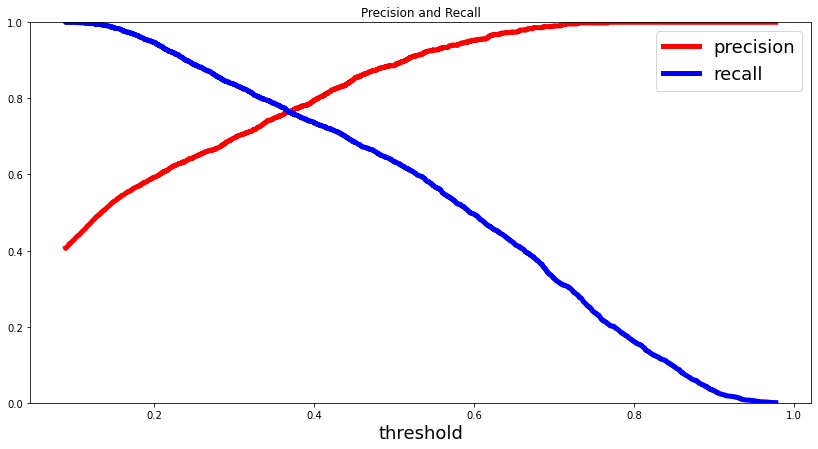

In [123]:
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [0]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.title("Precision vs Recall")
    plt.axis([0, 1.5, 0, 1.5])

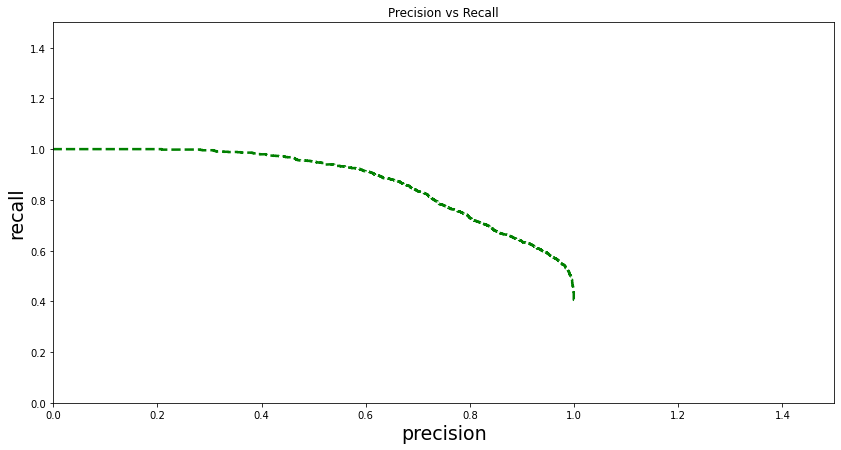

In [125]:
plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

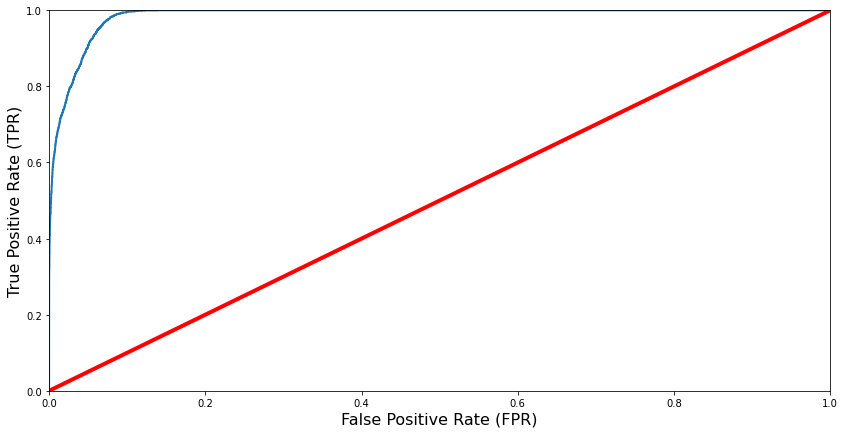

In [126]:
# ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [127]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train, y_scores)
print('The ROC AUC score is:', roc_auc)

The ROC AUC score is: 0.9860750216133615
